In [62]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


In [63]:
data = pd.read_csv('database_IND.csv')
pd.set_option('display.max_columns', None)
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [65]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [66]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can see there are many columns with null values. Checking the data and filtering these columns if they hold all NaN values

In [67]:
data['other_fuel2'].unique() 

# Only 1 entry, rest all are null.

array([nan, 'Oil'], dtype=object)

In [68]:
data['other_fuel3'].unique() # all null values, will be dropping this table

array([nan])

In [69]:
data['wepp_id'].unique() # Id column, with null values, will be dropped.

array([nan])

In [70]:
data['estimated_generation_gwh'].unique()

array([nan])

In [71]:
# From above we can see that there are many columns which have null values in them, so they won't make any impact.
# Hence we are dropping them
data.drop(['other_fuel1','other_fuel2',"other_fuel3","wepp_id","estimated_generation_gwh","url"],axis=1,inplace=True)

In [72]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [73]:
data.shape

(908, 21)

In [74]:
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Predicting fuel type is a problem of classification type.

__Exploring power plants based on Primary Fuel__

Text(0, 0.5, 'Count')

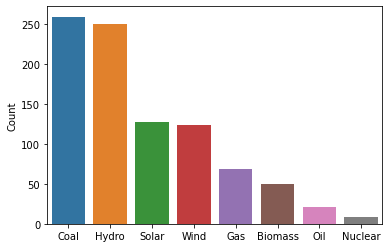

In [75]:
sns.barplot(x=data['primary_fuel'].value_counts().index,y=data['primary_fuel'].value_counts())
plt.ylabel('Count')

We observe there are more plants for Coal and Hydro than Oil and nuclear.

__Estimating the start date of Power Plants__

In [76]:
data['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

__Checking the countries__

In [77]:
data['country'].value_counts()

IND    908
Name: country, dtype: int64

In [78]:
data['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [79]:
# Dropping these 2 cols as same value in all.
data.drop(['country',"country_long"],axis=1,inplace=True)

In [80]:
# Total capacity of all the plants
total_capacity_mw = data['capacity_mw'].sum()
print('Total Installed Capacity: '+'{:.2f}'.format(total_capacity_mw) + ' MW')

Total Installed Capacity: 291510.11 MW


__Finding total contribution capacity per fuel type__

In [81]:
capacity = (data.groupby(['primary_fuel'])['capacity_mw'].sum()).to_frame()
capacity = capacity.sort_values('capacity_mw',ascending=False)
capacity['percentage_of_total'] = (capacity['capacity_mw']/total_capacity_mw)*100
capacity

,capacity_mw,percentage_of_total
primary_fuel,,
Coal,201423.220,69.096478
Hydro,46331.570,15.893641
Gas,25123.871,8.618525
Nuclear,8780.000,3.011902
Wind,4111.850,1.410534
Solar,2757.500,0.945936
Oil,1978.840,0.678824
Biomass,1003.260,0.344160


__Viewing the top 20 sources__

In [82]:
data['source'].value_counts(ascending=False).head(20)

Central Electricity Authority                            520
CDM                                                      124
Lancosola                                                 10
National Renewable Energy Laboratory                       8
National Thermal Power Corporation (NTPC)                  6
Reliance Power Ltd                                         4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)      4
Rajasthan Renewable Energy Corporation Limited (RREC)      4
Acc Acc ltd                                                4
Jk Cement ltd                                              4
Solairedirect                                              3
PEDA                                                       3
Ujaas Energy Limited                                       3
Ministry of New and Renewable Energy                       3
Jaypee Ltd jccl)                                           3
Karnataka Power Corporation Limited                        3
SunBorne Energy Gujarat 

In [83]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [84]:
data.nunique()

name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [105]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'owner',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'primary_fuel_category', 'source_cat'],
      dtype='object')

In [86]:
# Dropping identifier cols too.
df = data.drop(['name',"gppd_idnr"],axis=1,inplace=True)
df

In [106]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['primary_fuel_category', 'source_cat'], float64: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'], object: ['owner', 'url', 'geolocation_source', 'generation_data_source']}

In [ ]:
df['primary_fuel'].unique()

In [91]:
# Changing values of target column "FuelType" into numeric.
# creating instance of labelencoder

from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['primary_fuel_category'] = labelencoder.fit_transform(data['primary_fuel'])


data.drop(['primary_fuel'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_category
0,2.5,28.1839,73.2407,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,98.0,24.7663,74.6090,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,2
4,1800.0,21.9603,82.4091,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,1
904,3.0,12.8932,78.1654,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
905,25.5,15.2758,75.5811,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
906,80.0,24.3500,73.7477,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


__Handling other categorical variables__

In [101]:

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['source_cat'] = labelencoder.fit_transform(data['source'])


data

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_category,source_cat
0,2.5,28.1839,73.2407,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,109
1,98.0,24.7663,74.6090,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174
2,39.2,21.9038,69.3732,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,2,22
4,1800.0,21.9603,82.4091,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,1,22
904,3.0,12.8932,78.1654,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,77
905,25.5,15.2758,75.5811,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
906,80.0,24.3500,73.7477,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59


In [104]:
data.drop(['source'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,commissioning_year,owner,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_category,source_cat
0,2.5,28.1839,73.2407,2011.0,Solar Paces,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,109
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174
2,39.2,21.9038,69.3732,NaN,AES,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
3,135.0,23.8712,91.3602,2004.0,NaN,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,2,22
4,1800.0,21.9603,82.4091,2015.0,NaN,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,1,22
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,77
905,25.5,15.2758,75.5811,NaN,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59


In [103]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
other_fuel1               709
commissioning_year        380
owner                     566
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
primary_fuel_category       0
source_cat                  0
dtype: int64

In [116]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'No Source',
       'Industry About'], dtype=object)

In [115]:
data["geolocation_source"].fillna("No Source", inplace = True)
data

,capacity_mw,latitude,longitude,commissioning_year,owner,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_category,source_cat
0,2.5,28.1839,73.2407,2011.0,Solar Paces,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,109
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174
2,39.2,21.9038,69.3732,NaN,AES,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
3,135.0,23.8712,91.3602,2004.0,NaN,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,2,22
4,1800.0,21.9603,82.4091,2015.0,NaN,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,1,22
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,77
905,25.5,15.2758,75.5811,NaN,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59


In [118]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['geolocation_source_cat'] = labelencoder.fit_transform(data['geolocation_source'])
data


,capacity_mw,latitude,longitude,commissioning_year,owner,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,primary_fuel_category,source_cat,geolocation_source_cat
0,2.5,28.1839,73.2407,2011.0,Solar Paces,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,109,1
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174,3
2,39.2,21.9038,69.3732,NaN,AES,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3
3,135.0,23.8712,91.3602,2004.0,NaN,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,2,22,3
4,1800.0,21.9603,82.4091,2015.0,NaN,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,1,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,1,22,3
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,77,0
905,25.5,15.2758,75.5811,NaN,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59,3


In [143]:
data.drop(['geolocation_source'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,commissioning_year,owner,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_category,source_cat,geolocation_source_cat,generation_data_source_cat
0,2.5,28.1839,73.2407,2011.0,Solar Paces,NaN,NaN,NaN,NaN,NaN,NaN,6,109,1,1
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,1,174,3,1
2,39.2,21.9038,69.3732,NaN,AES,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1
3,135.0,23.8712,91.3602,2004.0,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2,22,3,0
4,1800.0,21.9603,82.4091,2015.0,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1,22,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,1,22,3,0
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,6,77,0,1
905,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,1,59,3,1


In [150]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['primary_fuel_category', 'source_cat', 'geolocation_source_cat', 'generation_data_source_cat', 'owner_cat'], float64: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']}

In [145]:
data['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [129]:
data["generation_data_source"].fillna("No Gen Source", inplace = True)


In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['generation_data_source_cat'] = labelencoder.fit_transform(data['generation_data_source'])
data.drop(['generation_data_source'],axis=1,inplace=True)


In [134]:
data

,capacity_mw,latitude,longitude,commissioning_year,owner,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_category,source_cat,geolocation_source_cat,generation_data_source_cat
0,2.5,28.1839,73.2407,2011.0,Solar Paces,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,6,109,1,1
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,NaN,NaN,NaN,NaN,NaN,NaN,1,174,3,1
2,39.2,21.9038,69.3732,NaN,AES,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1
3,135.0,23.8712,91.3602,2004.0,NaN,http://www.cea.nic.in/,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2,22,3,0
4,1800.0,21.9603,82.4091,2015.0,NaN,http://www.cea.nic.in/,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1,22,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,NaN,http://www.cea.nic.in/,2018.0,NaN,NaN,0.994875,233.596650,865.400000,1,22,3,0
904,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,NaN,NaN,NaN,NaN,NaN,NaN,6,77,0,1
905,25.5,15.2758,75.5811,NaN,NaN,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1
906,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,NaN,NaN,NaN,NaN,NaN,NaN,1,59,3,1


__Handling owner category__

In [146]:
data["owner"].fillna("No owner", inplace = True)

In [149]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['owner_cat'] = labelencoder.fit_transform(data['owner'])
data.drop(['owner'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_category,source_cat,geolocation_source_cat,generation_data_source_cat,owner_cat
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,6,109,1,1,230
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,174,3,1,259
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1,2
3,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,2,22,3,0,164
4,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1,22,3,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,2018.0,NaN,NaN,0.994875,233.596650,865.400000,1,22,3,0,164
904,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,77,0,1,114
905,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,21,3,1,164
906,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59,3,1,91


__Filling other NAN values__

In [159]:
data.isnull().sum()

capacity_mw                     0
latitude                       46
longitude                      46
commissioning_year            380
year_of_capacity_data         388
generation_gwh_2013           524
generation_gwh_2014           507
generation_gwh_2015           483
generation_gwh_2016           471
generation_gwh_2017           465
primary_fuel_category           0
source_cat                      0
geolocation_source_cat          0
generation_data_source_cat      0
owner_cat                       0
dtype: int64

In [163]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_category,source_cat,geolocation_source_cat,generation_data_source_cat,owner_cat
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,3.205947,43.823789,2.577093,0.504405,155.386564
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,2.281339,44.624092,1.019979,0.500256,51.253260
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,1.000000,22.000000,3.000000,0.000000,164.000000
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,3.000000,22.000000,3.000000,1.000000,164.000000
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,6.000000,29.250000,3.000000,1.000000,164.000000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,7.000000,190.000000,3.000000,1.000000,280.000000


In [162]:
cateogry_columns=data.select_dtypes(include=['object']).columns.tolist()
integer_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()
integer_columns

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [ ]:
data['commissioning_year','year_of_capacity_data',]

In [164]:
for column in data:
    if data[column].isnull().any():
        data[column]=data[column].fillna("0")
df = data
df

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel_category,source_cat,geolocation_source_cat,generation_data_source_cat,owner_cat
0,2.5,28.1839,73.2407,2011,0,0,0,0,0,0,6,109,1,1,230
1,98.0,24.7663,74.609,0,0,0,0,0,0,0,1,174,3,1,259
2,39.2,21.9038,69.3732,0,0,0,0,0,0,0,7,21,3,1,2
3,135.0,23.8712,91.3602,2004,2018,631.778,617.789,843.747,886.004,663.774,2,22,3,0,164
4,1800.0,21.9603,82.4091,2015,2018,1668.29,3035.55,5916.37,6243,5385.58,1,22,3,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016,2018,0,0,0.994875,233.597,865.4,1,22,3,0,164
904,3.0,12.8932,78.1654,0,0,0,0,0,0,0,6,77,0,1,114
905,25.5,15.2758,75.5811,0,0,0,0,0,0,0,7,21,3,1,164
906,80.0,24.35,73.7477,0,0,0,0,0,0,0,1,59,3,1,91


In [165]:
data.isnull().sum()

capacity_mw                   0
latitude                      0
longitude                     0
commissioning_year            0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
primary_fuel_category         0
source_cat                    0
geolocation_source_cat        0
generation_data_source_cat    0
owner_cat                     0
dtype: int64

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'primary_fuel_category'}>],
       [<AxesSubplot:title={'center':'source_cat'}>,
        <AxesSubplot:title={'center':'geolocation_source_cat'}>],
       [<AxesSubplot:title={'center':'generation_data_source_cat'}>,
        <AxesSubplot:title={'center':'owner_cat'}>]], dtype=object)

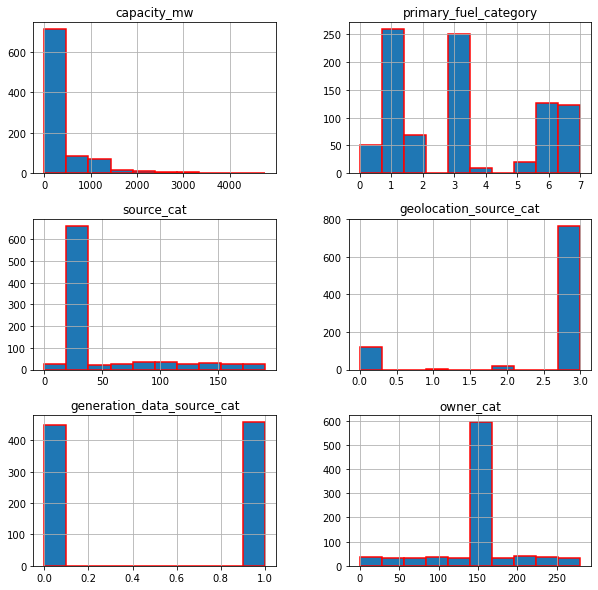

In [168]:
data.hist(edgecolor='red',linewidth=1.5,figsize=(10,10))

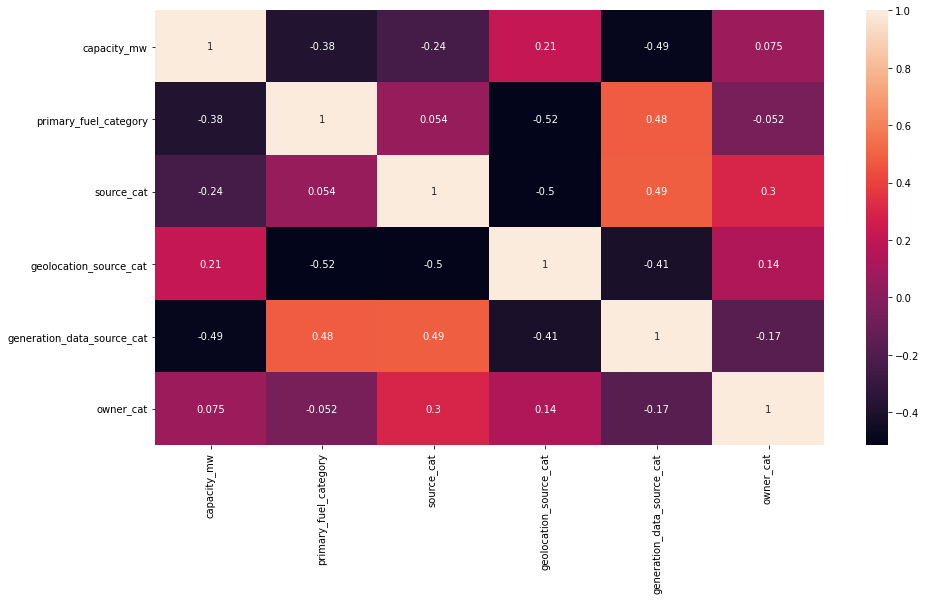

In [169]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [170]:
# Now Dataset is ready for use
# Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [171]:
x=data.drop('primary_fuel_category',axis=1)
x

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,source_cat,geolocation_source_cat,generation_data_source_cat,owner_cat
0,2.5,28.1839,73.2407,2011,0,0,0,0,0,0,109,1,1,230
1,98.0,24.7663,74.609,0,0,0,0,0,0,0,174,3,1,259
2,39.2,21.9038,69.3732,0,0,0,0,0,0,0,21,3,1,2
3,135.0,23.8712,91.3602,2004,2018,631.778,617.789,843.747,886.004,663.774,22,3,0,164
4,1800.0,21.9603,82.4091,2015,2018,1668.29,3035.55,5916.37,6243,5385.58,22,3,0,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016,2018,0,0,0.994875,233.597,865.4,22,3,0,164
904,3.0,12.8932,78.1654,0,0,0,0,0,0,0,77,0,1,114
905,25.5,15.2758,75.5811,0,0,0,0,0,0,0,21,3,1,164
906,80.0,24.35,73.7477,0,0,0,0,0,0,0,59,3,1,91


In [172]:
y= data['primary_fuel_category']
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel_category, Length: 908, dtype: int32

__Splitting Data__

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.20)

__Decision Tree__

In [174]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [175]:
dt.score(x_test,y_test)

0.7912087912087912

In [186]:
grid_param={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,40,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random']}

In [187]:
grid_search=GridSearchCV(dt,grid_param,cv=5)

In [188]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [190]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 18, 'splitter': 'best'}


In [184]:
dtn= DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_leaf=8,min_samples_split=3,splitter='best') 

In [185]:
dtn.fit(x_train,y_train)
dtn.score(x_test,y_test)

0.7802197802197802

In [191]:
dtn= DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=6,min_samples_split=18,splitter='best')

In [192]:
dtn.fit(x_train,y_train)
dtn.score(x_test,y_test)

0.7857142857142857

__Values before parameter tuning were better__

__Random Forest__

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [194]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [195]:
rf.score(x_test,y_test)

0.8736263736263736

In [196]:
param_grid ={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'n_estimators':[100,200,300]
}


In [197]:
grid_searchrf = GridSearchCV(rf,param_grid=param_grid,cv=4)

In [198]:
grid_searchrf.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100, 200, 300]})

In [199]:
best_param= grid_searchrf.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [200]:
rfn=RandomForestClassifier(criterion='gini',max_depth=18,min_samples_leaf=1,min_samples_split=4,n_estimators=100)
rfn.fit(x_train,y_train)

RandomForestClassifier(max_depth=18, min_samples_split=4)

In [201]:
rfn.score(x_test,y_test)

0.8571428571428571

__Our Random Forest model is performing well so we will use it for prediction__

In [202]:
import pickle
# Writing different model files to file
with open( 'GlobalPowerModel_RF.sav', 'wb') as f:
    pickle.dump(rf,f)